<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 4</b></center>    
<center><b><h1>Jeet_Bhalodi</b></center>       
<pre>    

## Simple Linear Regression

## Step 1. Import the necessary libraries

In [2]:
import pandas as pd

## Step 2. Import the dataset

In [176]:
df = pd.read_csv("50_Startups.csv")

In [177]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [178]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [179]:
df.shape

(50, 5)

## Step 3 . Check the State Column

In [180]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

## Step 4 . Splitting dataset in to input and output

In [181]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [182]:
# train_test_split
X = df.drop(['Profit'],axis=1)
y = df['Profit']


In [183]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [184]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

## Step 5 . Convert state Column into Numeric Column

## Step 5.1 .  Perform Transformation

In [185]:
X1=pd.get_dummies(X)

In [186]:
X1.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,False,True
1,162597.70,151377.59,443898.53,True,False,False
2,153441.51,101145.55,407934.54,False,True,False
3,144372.41,118671.85,383199.62,False,False,True
4,142107.34,91391.77,366168.42,False,True,False


## Step 6 . Dummy variable trap

In [187]:
# Already Performed using | drop_first =True
X=pd.get_dummies(X,drop_first=True)

In [188]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


## Step 7 Splitting dataset in to Train and Test

In [189]:
import sklearn as sk

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [192]:
X_train.shape

(30, 5)

In [193]:
X_test.shape

(20, 5)

In [194]:
y_train.shape

(30,)

In [195]:
y_test.shape

(20,)

In [216]:
print(X.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida',
       'State_New York'],
      dtype='object')


## Step 8  Import LinearRegression model from linear_model family 

In [196]:
from sklearn.linear_model import LinearRegression 

## Step 9  Fit the data

In [197]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Step 10  Predict the data

In [198]:
y_predict = model.predict(X_test)

In [199]:
y_predict

array([126286.74269139,  85962.53018637,  99718.31015987,  47006.59158351,
       128686.72888371,  52718.44579636, 109286.25721117, 100463.50283326,
        97189.19834331, 111759.66066852, 129299.96054465, 174361.92402544,
        93750.43444851, 149773.79897561, 173560.79559686, 154581.65120811,
        77992.52992211,  58976.69463119,  45113.58871378, 145529.37142111])

## Step 11  Display Result

In [200]:
# y_test and y_predict

In [201]:
import matplotlib.pyplot as plt

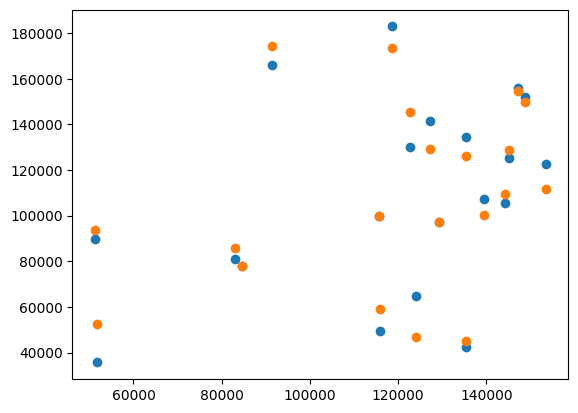

In [202]:
plt.scatter(X_test['Administration'],y_test)
plt.scatter(X_test['Administration'],y_predict)
plt.show()

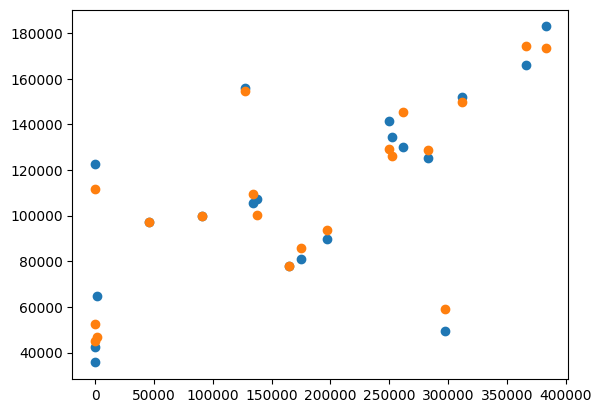

In [203]:
plt.scatter(X_test['Marketing Spend'],y_test)
plt.scatter(X_test['Marketing Spend'],y_predict)
plt.show()

## RSS

In [204]:
import numpy as np

In [205]:
RSS = np.sum((y_test-y_predict)**2)

In [206]:
print(RSS)

1561882432.5002618


## R Square

In [207]:
from sklearn.metrics import r2_score

In [208]:
r2 = r2_score(y_test,y_predict)

In [209]:
print(f"Accuracy :- {r2 * 100:.2f} %")

Accuracy :- 95.27 %


In [210]:
# Save the model
import joblib
joblib.dump(model, "model.pkl")
print("Model saved as model.pkl")

Model saved as model.pkl


In [211]:
model = joblib.load("model.pkl")

## Now use Polynomial Regression on Position_Salaries dataset

In [130]:
data=pd.read_csv("Position_Salaries.csv")

In [131]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [134]:
# train_test_split
X1 = data.drop(['Salary'],axis=1)
y1 = data['Salary']


In [135]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=42)

In [140]:
X1=pd.get_dummies(X1,drop_first=True)

In [141]:
X1

,Level,Position_Business Analyst,Position_C-level,Position_CEO,Position_Country Manager,Position_Junior Consultant,Position_Manager,Position_Partner,Position_Region Manager,Position_Senior Consultant,Position_Senior Partner
0,1,True,False,False,False,False,False,False,False,False,False
1,2,False,False,False,False,True,False,False,False,False,False
2,3,False,False,False,False,False,False,False,False,True,False
3,4,False,False,False,False,False,True,False,False,False,False
4,5,False,False,False,True,False,False,False,False,False,False
5,6,False,False,False,False,False,False,False,True,False,False
6,7,False,False,False,False,False,False,True,False,False,False
7,8,False,False,False,False,False,False,False,False,False,True
8,9,False,True,False,False,False,False,False,False,False,False
9,10,False,False,True,False,False,False,False,False,False,False


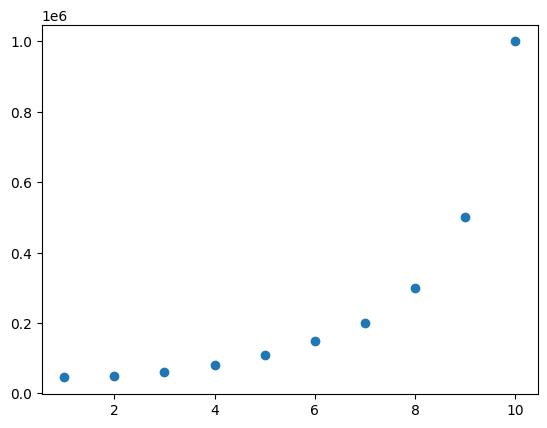

In [166]:
plt.scatter(data['Level'],data['Salary'])

In [127]:
from sklearn.preprocessing import PolynomialFeatures

In [146]:
model1 = PolynomialFeatures(degree=4)
X_poly = model1.fit_transform(X1)


array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  2.,  0., ...,  0.,  0.,  0.],
       [ 1.,  3.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  8.,  0., ...,  0.,  0.,  1.],
       [ 1.,  9.,  0., ...,  0.,  0.,  0.],
       [ 1., 10.,  0., ...,  0.,  0.,  0.]], shape=(10, 1365))